In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("./data_akash/data.csv")

In [4]:
df.head()

,fl,fw,gt,inl,inw,k,k_mul,pl,pt,pw,sl,st,sw,x,freq,s11,gain,bandwidth
0,7.5,3.5,0.4,7.0,0.35,4.5,0.5,20.0,0.4,23.7,35.0,3.0,55.0,3.5,3.3634,-15.570565,2.658204,0.185460
1,8.0,3.5,0.4,7.0,0.35,4.5,0.5,19.0,0.4,23.7,35.0,3.0,55.0,3.5,3.5398,-22.357957,4.047313,0.229875
2,8.5,3.5,0.4,7.0,0.35,4.5,0.5,18.0,0.4,23.7,35.0,3.0,55.0,3.5,3.7211,-37.020460,4.519793,0.261952
3,9.0,3.5,0.4,7.0,0.35,4.5,0.5,17.0,0.4,23.7,35.0,3.0,55.0,3.5,3.8975,-20.999447,5.282055,0.264205
4,9.5,3.5,0.4,7.0,0.35,4.5,0.5,16.0,0.4,23.7,35.0,3.0,55.0,3.5,4.1278,-15.150488,5.675588,0.231509


In [5]:
df = df.sample(frac=1).reset_index(drop=True)

In [6]:
df.head()

,fl,fw,gt,inl,inw,k,k_mul,pl,pt,pw,sl,st,sw,x,freq,s11,gain,bandwidth
0,10.5,2.1,0.4,4.0,0.21,4.5,0.5,14.0,0.4,23.7,35.0,3.0,55.0,2.5,4.5051,-30.139406,6.672163,0.331848
1,8.5,2.4,0.4,5.0,0.24,4.5,0.5,18.0,0.4,23.7,35.0,3.0,55.0,3.5,3.6672,-27.826117,4.729219,0.233952
2,8.0,1.8,0.4,6.0,0.18,4.5,0.5,19.0,0.4,23.7,35.0,3.0,55.0,3.5,3.4565,-44.198766,3.566555,0.187352
3,7.5,1.8,0.4,4.0,0.18,4.5,0.5,20.0,0.4,23.7,35.0,3.0,55.0,2.0,3.3732,-18.460260,3.089006,0.169077
4,10.0,2.7,0.4,7.0,0.27,4.5,0.5,15.0,0.4,23.7,35.0,3.0,55.0,2.5,4.3140,-14.144409,5.415743,0.233637


In [7]:
xcols = ['fw', 'inl', 'pl', 'x']
ycols = ['freq', 's11', 'gain']

data_x = df[xcols].values
data_y = df[ycols].values

In [8]:
def train_test_split(data: np.ndarray, tsp=0.8):
    train_size = round(tsp * len(data))
    return data[:train_size], data[train_size:]

In [9]:
train_x, test_x = train_test_split(data_x)
train_y, test_y = train_test_split(data_y)

In [10]:
from Scaler import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(train_x)
scaler_y.fit(train_y)

train_x_t = scaler_x.transform(train_x)
test_x_t = scaler_x.transform(test_x)

train_y_t = scaler_y.transform(train_y)
test_y_t = scaler_y.transform(test_y)

In [11]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(64, input_dim=train_x_t.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 3)                 195       
                                                                 
Total params: 12,995
Trainable params: 12,995
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(train_x_t, train_y_t, validation_split=0.1, epochs = 1000)

Epoch 1/1000
52/52 [==============================] - 1s 5ms/step - loss: 0.1332 - mae: 0.2878 - val_loss: 0.0484 - val_mae: 0.1711
Epoch 2/1000
52/52 [==============================] - 0s 3ms/step - loss: 0.0323 - mae: 0.1319 - val_loss: 0.0144 - val_mae: 0.0880
Epoch 3/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.0140 - mae: 0.0802 - val_loss: 0.0066 - val_mae: 0.0543
Epoch 4/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.0078 - mae: 0.0549 - val_loss: 0.0042 - val_mae: 0.0434
Epoch 5/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.0060 - mae: 0.0479 - val_loss: 0.0039 - val_mae: 0.0421
Epoch 6/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.0052 - mae: 0.0443 - val_loss: 0.0033 - val_mae: 0.0358
Epoch 7/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.0047 - mae: 0.0413 - val_loss: 0.0031 - val_mae: 0.0381
Epoch 8/1000
52/52 [==============================] - 0s 2ms/step - loss: 0.

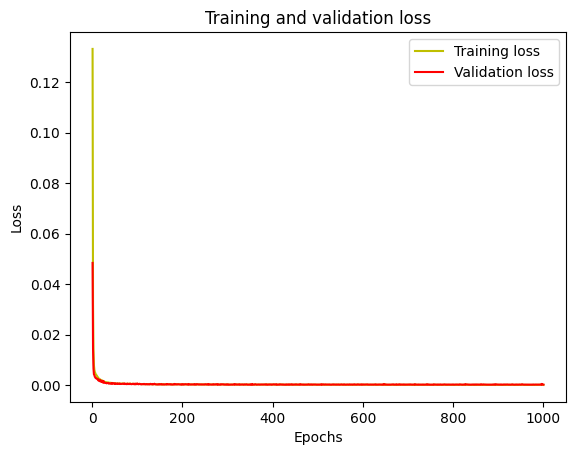

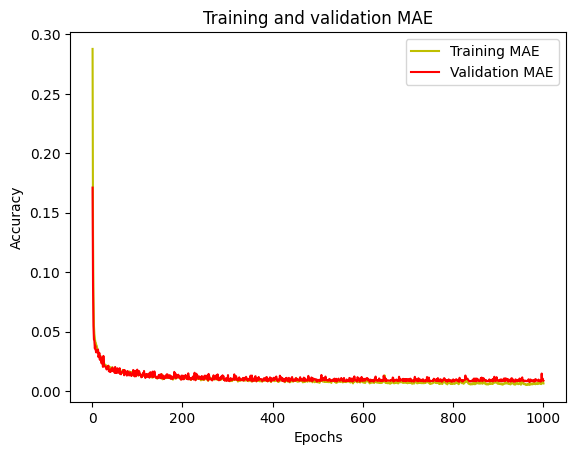

15/15 [==============================] - 0s 897us/step - loss: 3.4334e-04 - mae: 0.0098
MSE-NN:  0.0003433423989918083
MAE-NN:  0.009768795222043991


In [13]:
from matplotlib import pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

mse_neural, mae_neural = model.evaluate(test_x_t, test_y_t)
print('MSE-NN: ', mse_neural)
print('MAE-NN: ', mae_neural)

In [14]:
pred_y_t = model.predict(test_x_t)
pred_y = scaler_y.inverse_transform(pred_y_t)

15/15 [==============================] - 0s 1ms/step


In [15]:
pred_y[:5]

array([[  3.5531723, -10.794056 ,   4.24018  ],
       [  4.0590105, -16.865643 ,   6.0058208],
       [  4.2721233, -24.884937 ,   6.3767247],
       [  3.381292 , -19.102737 ,   3.179021 ],
       [  4.872282 , -18.848614 ,   5.7629385]], dtype=float32)

In [16]:
test_y[:5]

array([[  3.5447    , -10.63328621,   4.21139976],
       [  4.069     , -16.65717096,   5.99309295],
       [  4.2601    , -25.03825661,   6.39544082],
       [  3.3487    , -17.91449949,   2.90045872],
       [  4.8726    , -18.48219536,   5.76685676]])

In [20]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score

import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay


def print_metrics(bar, model, x_test, y_test):
    predicted = model.predict(x_test)
    print(bar)

    display = PredictionErrorDisplay(y_true=y_test, y_pred=predicted)
    display.plot(kind="actual_vs_predicted")
    plt.show()

    print(f"R2 Score: {r2_score(y_test, predicted)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, predicted)}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, predicted)}")
    print(f"Mean Absolute Error: {median_absolute_error(y_test, predicted)}")
    print(f"Explained Varaince Score: {explained_variance_score(y_test, predicted)}")

    print()

15/15 [==============================] - 0s 961us/step
Neural Network


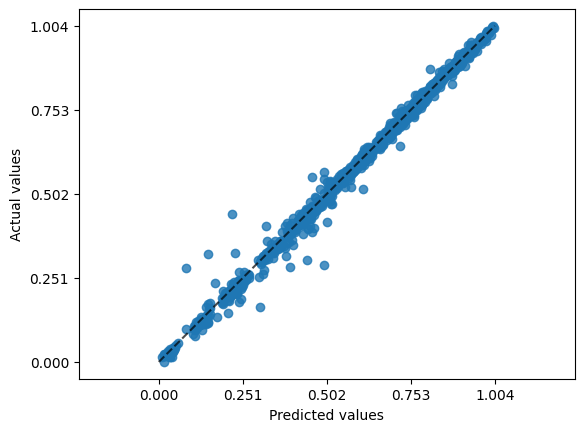

R2 Score: 0.9887893092234171
Mean Absolute Error: 0.009768794432957506
Mean Squared Error: 0.0003433424205685867
Mean Absolute Error: 0.006176625204745341
Explained Varaince Score: 0.9889380152496751



In [21]:
print_metrics("Neural Network", model, test_x_t, test_y_t)